# Medical Imaging
## 2021-2022

### Lab 3
João Félix Pimenta | Maja Milekic | Miguel Joaquim Roque Fernandes 

In [1]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, rescale, iradon
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
from roipoly import RoiPoly
import math
import statistics
from PIL import Image
from skimage.util import random_noise

### 1. Load the phantom, get its dimensions, and display it.

['__globals__', '__header__', '__version__', 'derenzo']
dimensions = 256 256


C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


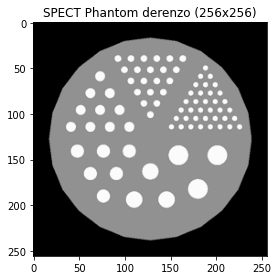

In [2]:
#Load SPECT image of the phantom
x = loadmat('derenzo.mat')
print(sorted(x.keys()))

# select variable 'im' and convert it from dictionary to numpy array
phantom = np.array(x['derenzo'])

# print image size (dimensions)
[rows, cols] = phantom.shape
print("dimensions =", rows, cols)

#Display phantom
plt.figure()
plt.title("SPECT Phantom derenzo (256x256)")
plt.imshow(phantom, cmap=plt.cm.Greys_r)
plt.tight_layout()
plt.show()

### 2. Simulate the sinogram and reconstructed SPECT image of the phantom by filtered back-projection, first without and then with noise (using the random.poisson function of the numpy library as in the previous lab). Make sure to constrain the reconstructed image to have the same size as the phantom.

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reconstructed image size:  (256, 256)


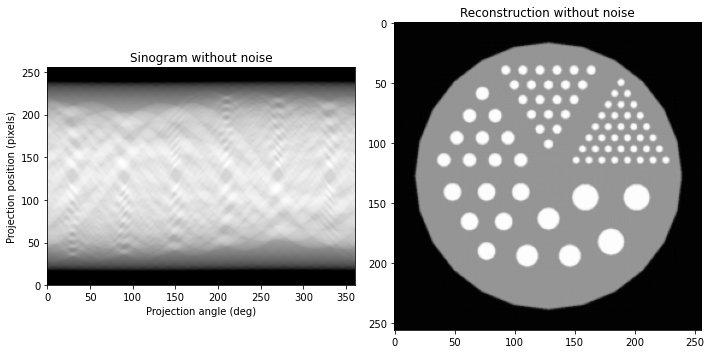

Reconstructed noisy image size:  (256, 256)


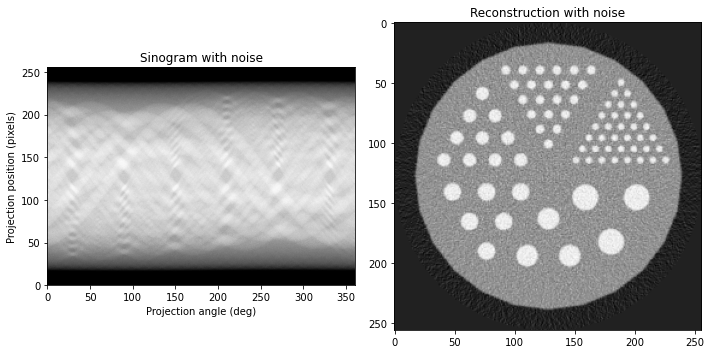

In [54]:
#Simulate the sinogram obtained by collecting projections covering [0;360]° in steps of 0.25°
theta = np.linspace(0., 360., 1440, endpoint=False)

#Without noise
sinogram = radon(phantom, theta)

#Rescale sinogram to maximum number of photon counts = 1500
sinogram_s = sinogram*1500/(np.max(sinogram)) #multiply by rescaling factor (= desirable max np / current max np)

#print(np.max(sinogram))
#print(np.max(sinogram_s))

reconstruction = iradon(sinogram_s, theta=theta, filter_name='ramp') #apply the Ram-Lak filter (default)

#Check if reconstructed image is the same size as the phantom
print("Reconstructed image size: ", reconstruction.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

dx, dy = 0.5 * 360.0 / 1440, 0.5 / sinogram.shape[0]
ax1.set_title("Sinogram without noise")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_s, cmap=plt.cm.Greys_r,
           extent=(-dx, 360.0 + dx, -dy, sinogram.shape[0] + dy),
           )

ax2.set_title("Reconstruction without noise")
ax2.imshow(reconstruction, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

#With noise
#Add Poisson noise
sinogram_n = np.random.poisson(sinogram_s)  #add the Poisson noise to the projection data (original sinogram)

#Rescale sinogram to maximum number of photon counts = 1500
sinogram_n_scaled = sinogram_n*1500/(np.max(sinogram_n)) #multiply by rescaling factor (= desirable max np / current max np)

#print(np.max(sinogram_n))
#print(np.max(sinogram_n_scaled))

#Reconstruct image from noisy sinogram
reconstruction_n = iradon(sinogram_n_scaled, theta=theta, filter_name='ramp')

#Check if reconstructed image is the same size as the phantom
print("Reconstructed noisy image size: ", reconstruction_n.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

ax1.set_title("Sinogram with noise")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_n_scaled, cmap=plt.cm.Greys_r,
           extent=(-dx, 360.0 + dx, -dy, sinogram.shape[0] + dy)
          )

ax2.set_title("Reconstruction with noise")
ax2.imshow(reconstruction_n, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

Image characteristics change when we add the noise - SNR decreases, because we have higher number of photon counts in the background (relative to the number of photon counts in the hot spots).
Rotation until 360$^\circ$  instead of 180$^\circ$ because of depth dependance! Photons that come from regions that are more distant from the detector (meaning that are at larger depth) suffer more attenuation than others closer the detector => do a full rotation to account for this.

Also, when performing the filtered back projection, the noise added is preserved because we used a Ram-Lak filter, which does not cut out the higher frequencies (such as noise).

If we were to do the difference between the two sinograms, the result would be the sinogram containing excluisively the random Poisson noise.

### 3. Define appropriate ROIs for the big, the medium and one of the small hotspots (using roipoly in Matlab /Python).

In [4]:
# RoiPoly requires a different matplotlib backend
%matplotlib qt
plt.figure('Drawing an ROI')
plt.imshow(phantom, cmap='gray', origin='upper', vmin=0, vmax=125)
big111_roi = RoiPoly(color='r')  # draw new ROI in red color


C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# RoiPoly requires a different matplotlib backend
%matplotlib qt
plt.figure('Drawing an ROI')
plt.imshow(phantom, cmap='gray', origin='upper', vmin=0, vmax=125)
big_roi = RoiPoly(color='r')  # draw new ROI in red color
plt.imshow(phantom, cmap='gray', origin='upper', vmin=0, vmax=125)
medium_roi = RoiPoly(color='b')
plt.imshow(phantom, cmap='gray', origin='upper', vmin=0, vmax=125)
small_roi = RoiPoly(color='g')

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#Renaming variables
Big_ROI = big_roi
Medium_ROI = medium_roi
Small_ROI = small_roi
rec = reconstruction
rec_noise = reconstruction_n
image = phantom
sinogram_scaled = sinogram_s
sinogram_noise = sinogram_n

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4. Illustrate and quantify the partial volume effects (PVE’s) suffered by each hot spot by:
a. plotting intensity profiles through the different hot spots; and
b. comparing their average intensities in the phantom (ground truth) and in the reconstructed image.
c. showing the effects of changing the spatial resolution and/or the SNR.
Note: Make sure to normalize both the phantom and the reconstructed image (to 1) so that the intensities are comparable between images.

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


False
Big mask mean = 190.65 , Big mask stdev=46.79
Medium mask mean = 173.91 , Medium mask stdev=50.76
Small mask mean = 136.88 , Small mask stdev=44.15


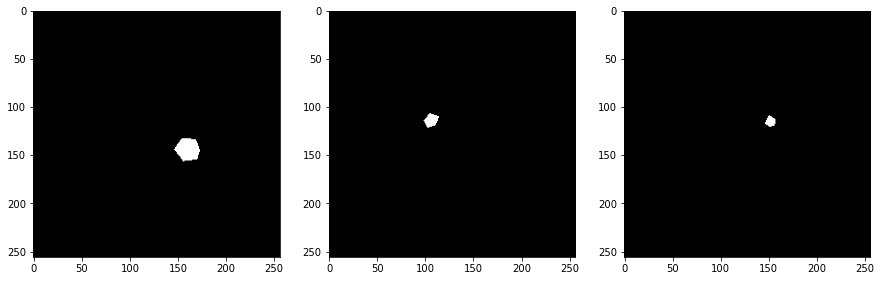

In [7]:
# Get masks (2D arrays) of the ROI
%matplotlib inline

plt.figure(figsize=(15,15))

# Big ROI
Big_mask = Big_ROI.get_mask(phantom)
plt.subplot(1,3,1)
plt.imshow(Big_mask, cmap='gray')
m = phantom[Big_mask].mean()
s = phantom[Big_mask].std()
print(Big_mask[40, 60])
print("Big mask mean = %.2f , Big mask stdev=%.2f" % (m, s))

# Medium ROI
Medium_mask = Medium_ROI.get_mask(phantom)
plt.subplot(1,3,2)
plt.imshow(Medium_mask, cmap='gray')
m = phantom[Medium_mask].mean()
s = phantom[Medium_mask].std()
print("Medium mask mean = %.2f , Medium mask stdev=%.2f" % (m, s))

# Small ROI
Small_mask = Small_ROI.get_mask(phantom)
plt.subplot(1,3,3)
plt.imshow(Small_mask, cmap='gray')
m = phantom[Small_mask].mean()
s = phantom[Small_mask].std()
print("Small mask mean = %.2f , Small mask stdev=%.2f" % (m, s))



C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Intensity')

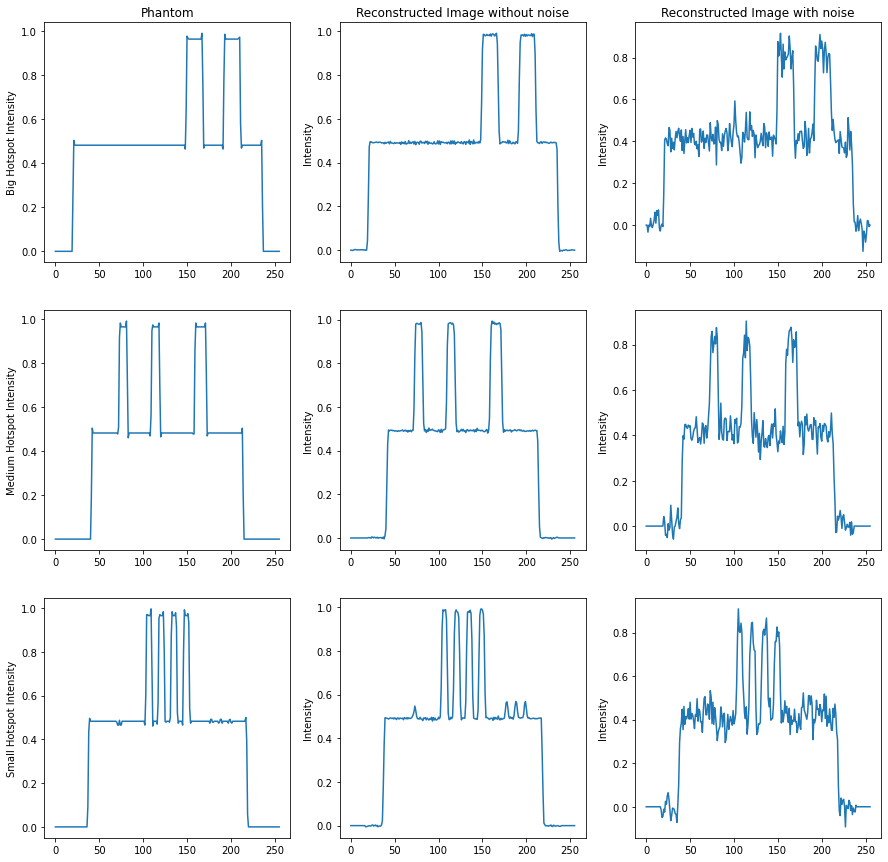

In [55]:
# Normalization
phantom_n = phantom/(np.max(phantom));
rec_n = rec/(np.max(rec));
rec_noise_n = rec_noise/(np.max(rec_noise));

# a. Intensity Profiles - Plot of intensities over all selected pixels

plt.figure(figsize=(15,15))

## Big hot spots

plt.subplot(3,3,1)
plt.plot(phantom_n[150, :])   #2 big hot spots
plt.title('Phantom')
plt.ylabel('Big Hotspot Intensity')

plt.subplot(3,3,2)
plt.plot(rec_n[150, :])  
plt.title('Reconstructed Image without noise')
plt.ylabel('Intensity')

plt.subplot(3,3,3)
plt.plot(rec_noise_n[150, :])
plt.title('Reconstructed Image with noise')
plt.ylabel('Intensity')

## Medium hot spots

plt.subplot(3,3,4)
plt.plot(phantom_n[:,60])    #3 medium hot spots
plt.ylabel('Medium Hotspot Intensity')

plt.subplot(3,3,5)
plt.plot(rec_n[:,60])
plt.ylabel('Intensity');

plt.subplot(3,3,6)
plt.plot(rec_noise_n[:,60])
plt.ylabel('Intensity')

## Small hot spots

plt.subplot(3,3,7)
plt.plot(phantom_n[65,:])    #4 small hot spots
plt.ylabel('Small Hotspot Intensity');

plt.subplot(3,3,8)
plt.plot(rec_n[65,:])
plt.ylabel('Intensity')

plt.subplot(3,3,9)
plt.plot(rec_noise_n[65,:])
plt.ylabel('Intensity')   

In [35]:
# b. Comparing average intensities in the phantom and in the reconstructed image

# Big hot spots
mean_phantom_big = np.mean(phantom_n[150, :])
mean_rec_big = np.mean(rec_n[150,:])
mean_rec_noise_big = np.mean(rec_noise_n[150,:])

# Medium hot spots
mean_phantom_medium = np.mean(phantom_n[:,60])
mean_rec_medium = np.mean(rec_n[:,60])
mean_rec_noise_medium = np.mean(rec_noise_n[:,60])

# Small hotspots
mean_phantom_small = np.mean(phantom_n[65,:])
mean_rec_small = np.mean(rec_n[65,:])
mean_rec_noise_small = np.mean(rec_noise_n[65,:])

print('Quantifying partial volume effects (PVEs)')
print('')
print('Suffered by the big hotspot:')
print('Average intensities in the phantom:', mean_phantom_big)
print('Average intensities in the reconstructed image:', mean_rec_big)
print('Average intensities in the reconstructed image with noise:', mean_rec_noise_big)
      
print('\nSuffered by the medium hotspot:')
print('Average intensities in the phantom: ', mean_phantom_medium)
print('Average intensities in the reconstructed image:', mean_rec_medium)
print('Average intensities in the reconstructed image with noise: ', mean_rec_noise_medium)

print('\nSuffered by the small hotspot:')
print('Average intensities in the phantom:', mean_phantom_small)
print('Average intensities in the reconstructed image:', mean_rec_small)
print('Average intensities in the reconstructed image with noise:', mean_rec_noise_small)

print('\nRatio from the phantom to noisy reconstruction:')
print('Big hotspots:', mean_rec_noise_big/mean_phantom_big)
print('Medium hotspots:', mean_rec_noise_medium/mean_phantom_medium)
print('Small hotspots:', mean_rec_noise_small/mean_phantom_small)


Quantifying partial volume effects (PVEs)

Suffered by the big hotspot:
Average intensities in the phantom: 0.4783271655701755
Average intensities in the reconstructed image: 0.4869154004923217
Average intensities in the reconstructed image with noise: 0.4071367414199276

Suffered by the medium hotspot:
Average intensities in the phantom:  0.3869928728070176
Average intensities in the reconstructed image: 0.3938631373287119
Average intensities in the reconstructed image with noise:  0.3336483379658871

Suffered by the small hotspot:
Average intensities in the phantom: 0.3921498081140351
Average intensities in the reconstructed image: 0.4016522269676611
Average intensities in the reconstructed image with noise: 0.3343671875579441

Ratio from the phantom to noisy reconstruction:
Big hotspots: 0.851167925899865
Medium hotspots: 0.862156286098499
Small hotspots: 0.8526516668872419


C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Partial volume effects are noticeable, especially in the reconstructed image with noise. The ratios obtained indicate that there is an underestimation of activity of about 14%-15% in all hotspots (big, medium, small). Therefore, the noise added caused degradation of the resolution, leading to some partial volume effects.

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Reconstruction with twice the noise, sigma=2.13')

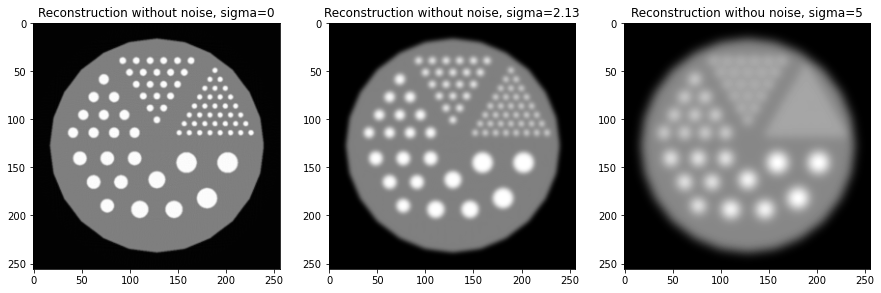

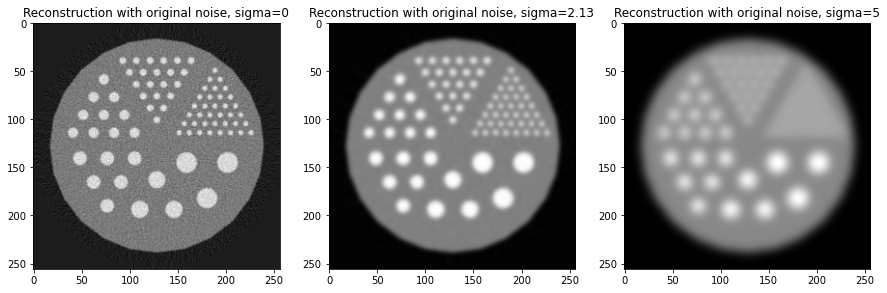

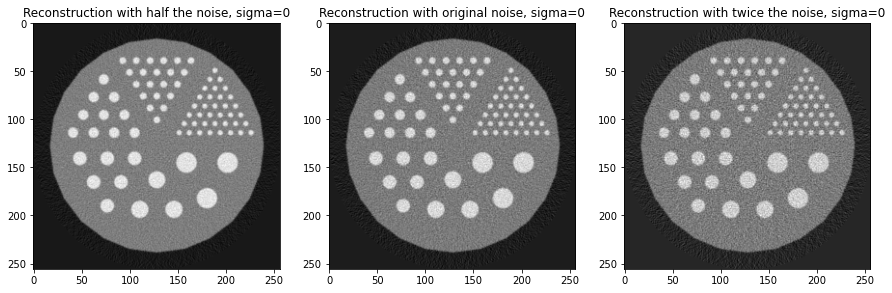

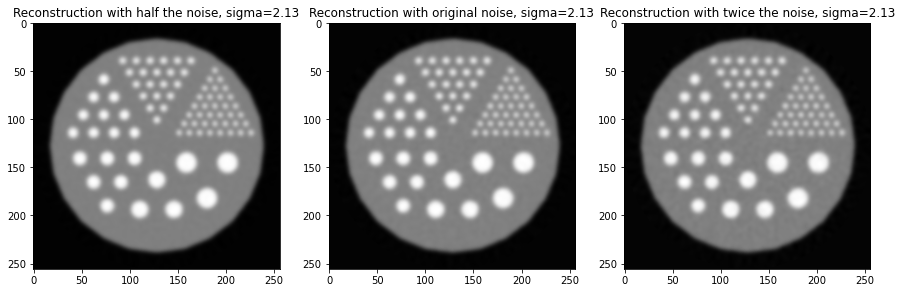

In [59]:
# c. Showing the effects of changing the spatial resolution and/or the SNR

#Variation of resolution without noise
rec_orig = iradon(sinogram_scaled,theta)
#FWHM=1cm -> 5 pixels -> Sigma=2.13
sinogram_2 = gaussian_filter(sinogram_scaled, 2.13)
rec_sigma_2 = iradon(sinogram_2,theta)
sinogram_5 = gaussian_filter(sinogram_scaled, 5)
rec_sigma_5 = iradon(sinogram_5,theta)

rec_orig_n = rec_orig/np.max(rec_orig)
rec_sigma_2_n = rec_sigma_2/np.max(rec_sigma_2)
rec_sigma_5_n = rec_sigma_5/np.max(rec_sigma_5)

#Variation of resolution with noise
rec_noise = iradon(sinogram_noise,theta)
#FWHM=1cm -> 5 pixels -> Sigma=2.13
sinogram_noise_2 = gaussian_filter(sinogram_noise, 2.13)
rec_noise_2 = iradon(sinogram_noise_2,theta)
sinogram_noise_5 = gaussian_filter(sinogram_noise, 5)
rec_noise_5 = iradon(sinogram_noise_5,theta)

rec_noise_n = rec_noise/np.max(rec_noise)
rec_noise_2_n = rec_noise_2/np.max(rec_noise_2)
rec_noise_5_n = rec_noise_5/np.max(rec_noise_5)

#Variation of SNR
sinogram_half = sinogram_scaled/2 #pixel values halved -> noise doubled 
sinogram_twice = sinogram_scaled*2 #pixel values doubled -> noise halved

sinogram_half_noise = np.random.poisson(sinogram_half)
sinogram_twice_noise = np.random.poisson(sinogram_twice)

sinogram_half_noise_scaled = sinogram_half_noise*1500/(np.max(sinogram_scaled))
sinogram_twice_noise_scaled = sinogram_twice_noise*1500/(np.max(sinogram_scaled))

rec_half = iradon(sinogram_half_noise_scaled,theta)
rec_twice = iradon(sinogram_twice_noise_scaled,theta)

reconst_half_n = rec_half/np.max(reconst_half)
reconst_twice_n = rec_twice/np.max(reconst_twice)


#Variation of noise with resolution Sigma=2.13
sinogram_half_noise_2 = gaussian_filter(sinogram_half_noise_scaled, 2.13)
rec_half_noise_2 = iradon(sinogram_half_noise_2,theta)

sinogram_twice_noise_2 = gaussian_filter(sinogram_twice_noise_scaled, 2.13)
rec_twice_noise_2 = iradon(sinogram_twice_noise_2,theta)

rec_half_noise_2_n = rec_half_noise_2/np.max(rec_half_noise_2)
rec_twice_noise_2_n = rec_twice_noise_2/np.max(rec_twice_noise_2)


plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(rec_orig_n, cmap='gray')
plt.title('Reconstruction without noise, sigma=0')
plt.subplot(1,3,2)
plt.imshow(rec_sigma_2_n, cmap='gray')
plt.title('Reconstruction without noise, sigma=2.13')
plt.subplot(1,3,3)
plt.imshow(rec_sigma_5_n, cmap='gray')
plt.title('Reconstruction withou noise, sigma=5')

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(rec_noise_n, cmap='gray')
plt.title('Reconstruction with original noise, sigma=0')
plt.subplot(1,3,2)
plt.imshow(rec_noise_2_n, cmap='gray')
plt.title('Reconstruction with original noise, sigma=2.13')
plt.subplot(1,3,3)
plt.imshow(rec_noise_5_n,cmap='gray')
plt.title('Reconstruction with original noise, sigma=5')

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(reconst_twice_n, cmap='gray')
plt.title('Reconstruction with half the noise, sigma=0')
plt.subplot(1,3,2)
plt.imshow(rec_noise_n, cmap='gray')
plt.title('Reconstruction with original noise, sigma=0')
plt.subplot(1,3,3)
plt.imshow(reconst_half_n,cmap='gray')
plt.title('Reconstruction with twice the noise, sigma=0')

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(rec_twice_noise_2_n, cmap='gray')
plt.title('Reconstruction with half the noise, sigma=2.13')
plt.subplot(1,3,2)
plt.imshow(rec_noise_2_n, cmap='gray')
plt.title('Reconstruction with original noise, sigma=2.13')
plt.subplot(1,3,3)
plt.imshow(rec_half_noise_2_n, cmap='gray')
plt.title('Reconstruction with twice the noise, sigma=2.13')


1st row: Changing R => changing sigma in the reconstructed image without noise

2nd row: Changing R => changing sigma in the reconstructed image with noise

3rd row: Changing SNR => changing level of noise in the reconstructed image (sigma = 0)

4th row: Changing SNR => changing level of noise in the reconstructed image (sigma = 2.13)

-> Next we analyse each situation by plotting the intensity profiles next to the images.

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


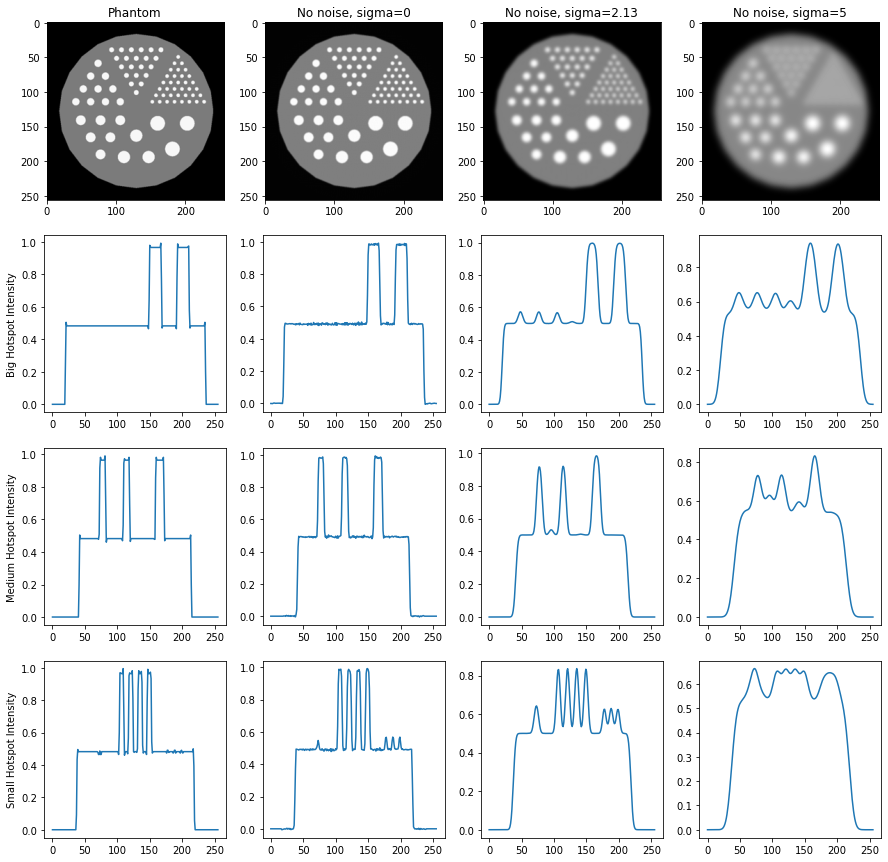

In [48]:
# Intensity Profiles - reconstructed image without noise, different resolution

plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
plt.imshow(phantom_n,cmap='gray')
plt.title('Phantom')

plt.subplot(4,4,2)
plt.imshow(rec_orig_n,cmap='gray')
plt.title('No noise, sigma=0')

plt.subplot(4,4,3)
plt.imshow(rec_sigma_2_n,cmap='gray')
plt.title('No noise, sigma=2.13')

plt.subplot(4,4,4)
plt.imshow(rec_sigma_5_n,cmap='gray')
plt.title('No noise, sigma=5')

## Big ROI (for one roi - row 180)
plt.subplot(4,4,5)
plt.plot(phantom_n[150,:])
plt.ylabel('Big Hotspot Intensity')

plt.subplot(4,4,6)
plt.plot(rec_orig_n[150,:])

plt.subplot(4,4,7)
plt.plot(rec_sigma_2_n[150,:])

plt.subplot(4,4,8)
plt.plot(rec_sigma_5_n[150,:])

## Medium ROI (for one roi - column 40)
plt.subplot(4,4,9)
plt.plot(phantom_n[:,60])
plt.ylabel('Medium Hotspot Intensity')

plt.subplot(4,4,10)
plt.plot(rec_orig_n[:,60])

plt.subplot(4,4,11)
plt.plot(rec_sigma_2_n[:,60])

plt.subplot(4,4,12)
plt.plot(rec_sigma_5_n[:,60])

## Small ROI (for one roi - column 220)

plt.subplot(4,4,13)
plt.plot(phantom_n[65,:]);
plt.ylabel('Small Hotspot Intensity');

plt.subplot(4,4,14)
plt.plot(rec_orig_n[65,:]);

plt.subplot(4,4,15)
plt.plot(rec_sigma_2_n[65,:])

plt.subplot(4,4,16)
plt.plot(rec_sigma_5_n[65,:])
 

We can perfectly see how the degradation of the resolution causes partial volume effects, especially in the small hot spots. Bluuring of the edges already occurs when sigma = 2.13. When sigma = 5, PVEs are very significant, as it is no longer possible to detect some of the smaller hot spots, and for the small ones, the activity suffers great underestimation (intensities decrease from close to 1 to a bit higher than 0.6 - see last row of plots above). 

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


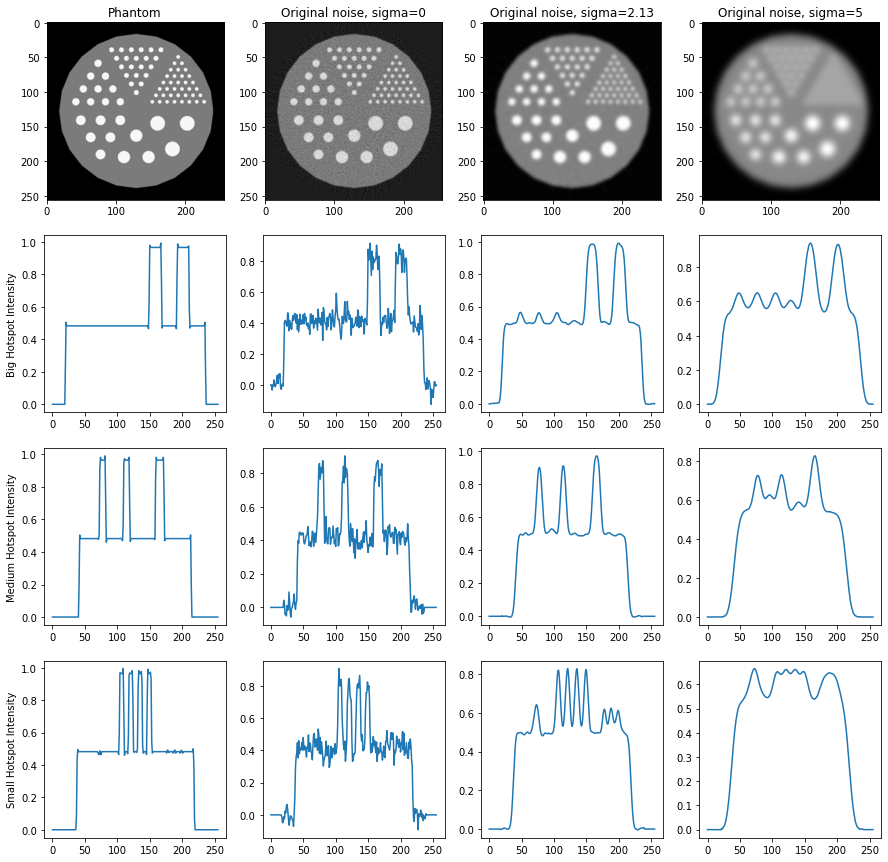

In [57]:
# Intensity Profiles - reconstructed image with noise, different resolution

plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
plt.imshow(phantom_n,cmap='gray')
plt.title('Phantom')

plt.subplot(4,4,2)
plt.imshow(rec_noise_n,cmap='gray')
plt.title('Original noise, sigma=0')

plt.subplot(4,4,3)
plt.imshow(rec_noise_2_n,cmap='gray')
plt.title('Original noise, sigma=2.13')

plt.subplot(4,4,4)
plt.imshow(rec_noise_5_n,cmap='gray')
plt.title('Original noise, sigma=5')

## Big ROI (for one roi - row 180)
plt.subplot(4,4,5)
plt.plot(phantom_n[150,:])
plt.ylabel('Big Hotspot Intensity')

plt.subplot(4,4,6)
plt.plot(rec_noise_n[150,:])

plt.subplot(4,4,7)
plt.plot(rec_noise_2_n[150,:])

plt.subplot(4,4,8)
plt.plot(rec_noise_5_n[150,:])

## Medium ROI (for one roi - column 40)
plt.subplot(4,4,9)
plt.plot(phantom_n[:,60])
plt.ylabel('Medium Hotspot Intensity')

plt.subplot(4,4,10)
plt.plot(rec_noise_n[:,60])

plt.subplot(4,4,11)
plt.plot(rec_noise_2_n[:,60])

plt.subplot(4,4,12)
plt.plot(rec_noise_5_n[:,60])

## Small ROI (for one roi - column 220)

plt.subplot(4,4,13)
plt.plot(phantom_n[65,:]);
plt.ylabel('Small Hotspot Intensity');

plt.subplot(4,4,14)
plt.plot(rec_noise_n[65,:]);

plt.subplot(4,4,15)
plt.plot(rec_noise_2_n[65,:])

plt.subplot(4,4,16)
plt.plot(rec_noise_5_n[65,:])

Same as in the reconstructed image without noise, but now we have the Poisson noise. The conclusions are the same: the degradation of resolution clearly causes PVEs, especially in small hot spots.

Interesting to note: The plots on the 3rd and 4th columns (sigma = 2.13 and sigma = 5, respectively) show little noise. This is because we used a Gaussian filter to manipulate the spatial resolution, and this filter cuts out the higher frequencies (such as noise).

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


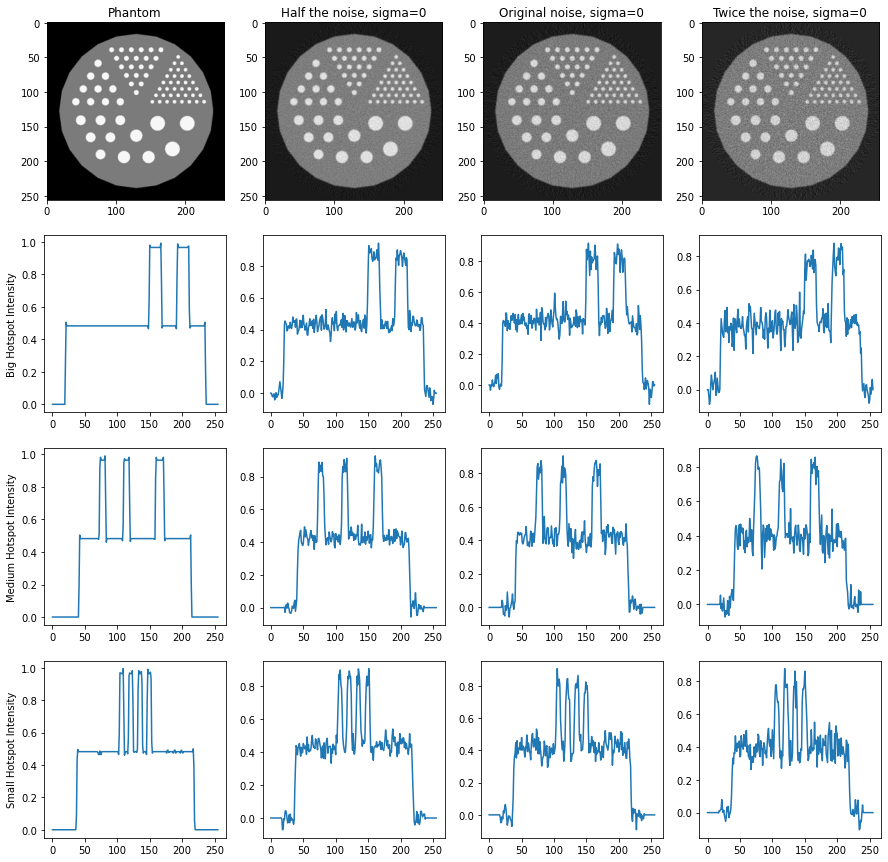

In [58]:
# Intensity Profiles - different noise levels, same good resolution (sigma = 0)

plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
plt.imshow(phantom_n,cmap='gray')
plt.title('Phantom')

plt.subplot(4,4,2)
plt.imshow(reconst_twice_n,cmap='gray')
plt.title('Half the noise, sigma=0')

plt.subplot(4,4,3)
plt.imshow(rec_noise_n,cmap='gray')
plt.title('Original noise, sigma=0')

plt.subplot(4,4,4)
plt.imshow(reconst_half_n,cmap='gray')
plt.title('Twice the noise, sigma=0')

## Big ROI (for one roi - row 180)
plt.subplot(4,4,5)
plt.plot(phantom_n[150,:])
plt.ylabel('Big Hotspot Intensity')

plt.subplot(4,4,6)
plt.plot(reconst_twice_n[150,:])

plt.subplot(4,4,7)
plt.plot(rec_noise_n[150,:])

plt.subplot(4,4,8)
plt.plot(reconst_half_n[150,:])

## Medium ROI (for one roi - column 40)
plt.subplot(4,4,9)
plt.plot(phantom_n[:,60])
plt.ylabel('Medium Hotspot Intensity')

plt.subplot(4,4,10)
plt.plot(reconst_twice_n[:,60])

plt.subplot(4,4,11)
plt.plot(rec_noise_n[:,60])

plt.subplot(4,4,12)
plt.plot(reconst_half_n[:,60])

## Small ROI (for one roi - column 220)

plt.subplot(4,4,13)
plt.plot(phantom_n[65,:]);
plt.ylabel('Small Hotspot Intensity');

plt.subplot(4,4,14)
plt.plot(reconst_twice_n[65,:]);

plt.subplot(4,4,15)
plt.plot(rec_noise_n[65,:])

plt.subplot(4,4,16)
plt.plot(reconst_half_n[65,:])

C:\Users\Maja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


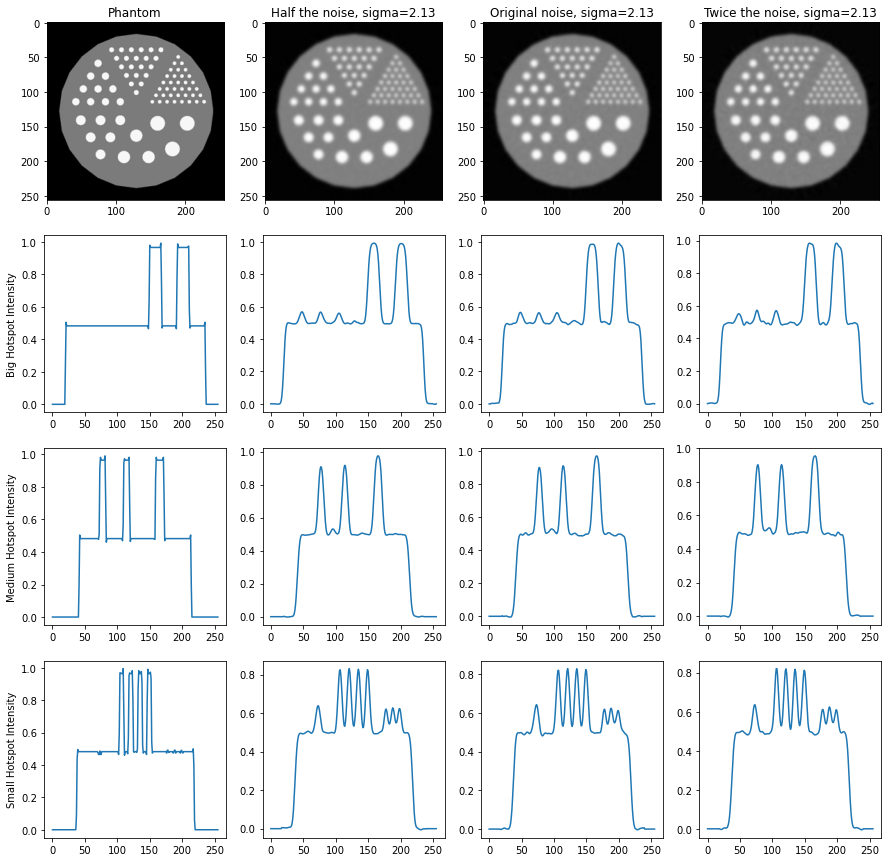

In [52]:
# Intensity Profiles - different noise levels, same bad resolution (sigma = 2.13)

plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
plt.imshow(phantom_n,cmap='gray')
plt.title('Phantom')

plt.subplot(4,4,2)
plt.imshow(rec_twice_noise_2_n,cmap='gray')
plt.title('Half the noise, sigma=2.13')

plt.subplot(4,4,3)
plt.imshow(rec_noise_2_n,cmap='gray')
plt.title('Original noise, sigma=2.13')

plt.subplot(4,4,4)
plt.imshow(rec_half_noise_2_n,cmap='gray')
plt.title('Twice the noise, sigma=2.13')

## Big ROI (for one roi - row 180)
plt.subplot(4,4,5)
plt.plot(phantom_n[150,:])
plt.ylabel('Big Hotspot Intensity')

plt.subplot(4,4,6)
plt.plot(rec_twice_noise_2_n[150,:])

plt.subplot(4,4,7)
plt.plot(rec_noise_2_n[150,:])

plt.subplot(4,4,8)
plt.plot(rec_half_noise_2_n[150,:])

## Medium ROI (for one roi - column 40)
plt.subplot(4,4,9)
plt.plot(phantom_n[:,60])
plt.ylabel('Medium Hotspot Intensity')

plt.subplot(4,4,10)
plt.plot(rec_twice_noise_2_n[:,60])

plt.subplot(4,4,11)
plt.plot(rec_noise_2_n[:,60])

plt.subplot(4,4,12)
plt.plot(rec_half_noise_2_n[:,60])

## Small ROI (for one roi - column 220)

plt.subplot(4,4,13)
plt.plot(phantom_n[65,:]);
plt.ylabel('Small Hotspot Intensity');

plt.subplot(4,4,14)
plt.plot(rec_twice_noise_2_n[65,:]);

plt.subplot(4,4,15)
plt.plot(rec_noise_2_n[65,:])

plt.subplot(4,4,16)
plt.plot(rec_half_noise_2_n[65,:])

In this case, it is difficult to tell the differences when changing the level of noise (from half to twice), because in all images we applied a Gaussian filter (sigma = 2.13), which cuts out  most of the noise. So the results for the reconstructed image seem almost the same for all levels of noise (plots in 2nd, 3rd, and 4th columns).